In [13]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn import datasets

In [14]:
% matplotlib inline

In [15]:
diabetes = datasets.load_diabetes()
data, target = diabetes.data, diabetes.target
num_insts, num_attrs = data.shape
augmented_data = np.ones((num_insts, num_attrs + 1))
num_attrs += 1
augmented_data[:, :-1] = data
data = augmented_data
idx = np.arange(num_insts)
np.random.shuffle(idx)
num_train = int(0.7 * num_insts)
data, target = data[idx], target[idx]
data_train, target_train = data[:num_train], target[:num_train]
data_test, target_test = data[num_train:], target[num_train:]
print("Number of training data: {}".format(num_train))
print("Number of test data: {}".format(num_insts - num_train))
print("Number of attributes: {}".format(data.shape[1]))

Number of training data: 309
Number of test data: 133
Number of attributes: 11


In [22]:
# Method 1, implement the gradient descent algorithm
w = np.zeros(num_attrs)

## Please implement your gradient descent method here.
## Stop condition: ||gradient|| <= eps || num_iters > 5000
eps = 1e-3
max_iters = 5000
train_losses, train_gradients = np.zeros(max_iters), np.zeros(max_iters)
num_iters = 0
start_time = time.time()


def error_function(theta, X, y):
    diff = np.dot(X, theta) - y
    return (1./2*m) * np.dot(np.transpose(diff), diff)

def gradient_function(theta, X, y):
    diff = np.dot(X, theta) - y
    return (1./m) * np.dot(np.transpose(X), diff)

alpha = 0.01
theta = 1
gradient = gradient_function(theta,data_train,target_train)
train_gradients[0] = gradient
num_iters += 1


while((num_iters < 5000) and (gradient > eps)):
    theta = theta - alpha*gradient
    graident = gradient_function(theta, data_train, target_train)
    train_gradients[num_iters] = gradient
    train_losses[num_iters] = error_function(theta, data_train, target_train)

## Your code here, remember:
## 1. You should record your training loss in each iteration
## 2. You should record your gradient norm in each iteration
## 3. Remember that even for convex functions, if step_size/learning_rate is too larget, then it can diverge.



end_time = time.time()
print("Time elapsed for training: {} seconds.".format(end_time - start_time))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Time elapsed for training: 0.0018889904022216797 seconds.


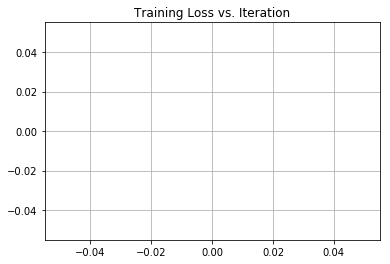

In [5]:
## Plot training losses
plt.figure()
plt.plot(np.arange(num_iters), train_losses[:num_iters], "b--", linewidth=2)
plt.grid(True)
plt.title("Training Loss vs. Iteration")
plt.show()

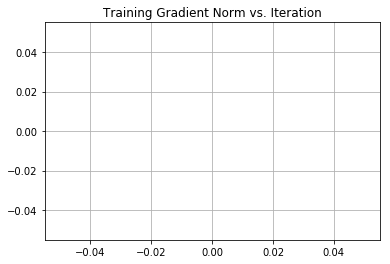

In [7]:
## Plot training gradient norms
plt.figure()
plt.plot(np.arange(num_iters), train_gradients[:num_iters], "g--", linewidth=2)
plt.grid(True)
plt.title("Training Gradient Norm vs. Iteration")
plt.show()

In [8]:
## Check the value of final weight vector w
print(w)

## Use the obtained w for prediction, record the test error.
preds = np.dot(data_test, w)
mse_test = np.mean((preds - target_test) ** 2)
print("Average test error: {}.".format(mse_test))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average test error: 28530.3007518797.


In [9]:
# Method 2, implement the closed-form solution
start_time = time.time()
end_time = time.time()
print("Time elapsed: {} seconds.".format(end_time - start_time))
print(w)

Time elapsed: 2.8133392333984375e-05 seconds.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
## Use the obtained w for prediction, record the test error.
preds = np.dot(data_test, w)
mse_test = np.mean((preds - target_test) ** 2)
print("Average test error: {}.".format(mse_test))

Average test error: 28530.3007518797.


In [11]:
## Check whether two results are consistent? Why??